In [34]:
import numpy as np
import math
import pandas as pd
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [35]:
ds = xr.open_dataset("CERES_EBAF-TOA_200003-201701.nc", engine="netcdf4")
ds

<xarray.Dataset>
Dimensions:                      (lon: 360, time: 203, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    ...                           ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

In [36]:
#calculate the TOA longwave, shortwave, and solar radiation for all-sky conditions,all for the three conditions sum up
sw=ds.toa_sw_all_mon.mean(dim='time')
lw=ds.toa_lw_all_mon.mean(dim='time')
solar=ds.solar_mon.mean(dim='time')
net=ds.toa_net_all_mon.mean(dim='time')
all=solar-sw-lw

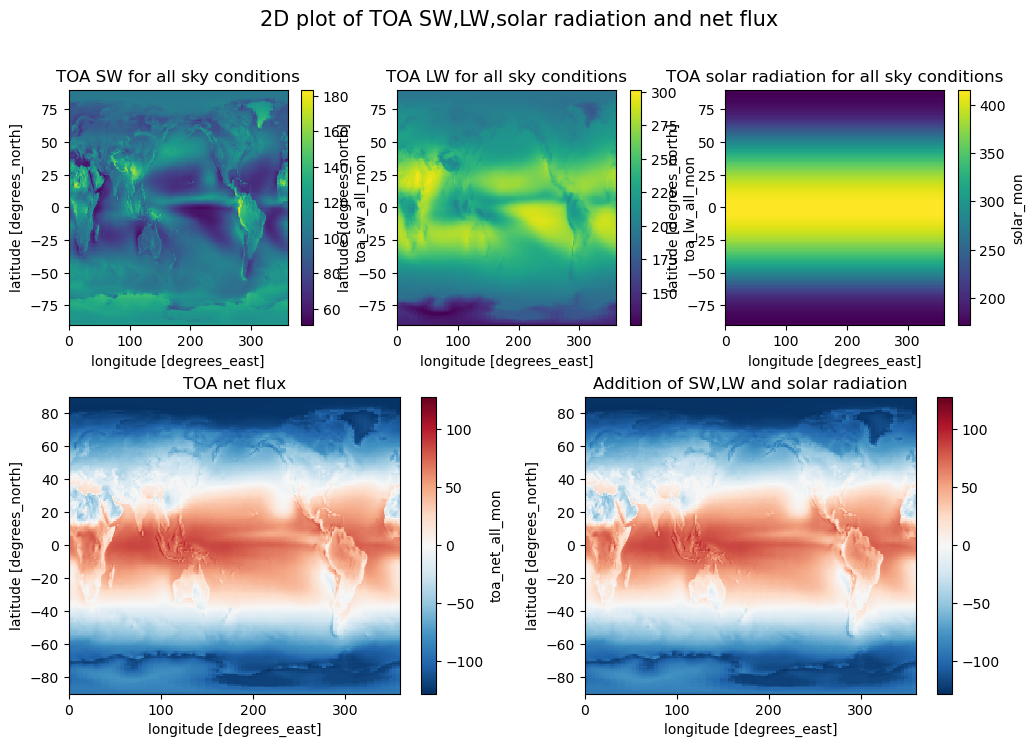

In [37]:
#plot the 2D figures and verify (visually) that they are equivalent to the TOA net flux
fields = {0:'TOA SW for all sky conditions', 
          1:'TOA LW for all sky conditions', 
          2:'TOA solar radiation for all sky conditions', 
          3:'TOA net flux',
          4:'Addition of SW,LW and solar radiation'}
#figure parameters
fig = plt.figure(figsize=(12,8), dpi=100)
grid = plt.GridSpec(10, 20) 
plt.subplot(grid[0:4,0:6]) 
sw.plot()  
plt.title(fields[0])
plt.subplot(grid[0:4,7:13])  
lw.plot()    
plt.title(fields[1])
plt.subplot(grid[0:4,14:20]) 
solar.plot()   
plt.title(fields[2])
plt.subplot(grid[5:10,0:9]) 
net.plot()   
plt.title(fields[3])
plt.subplot(grid[5:10,11:20]) 
all.plot()   
plt.title(fields[4])
plt.suptitle('2D plot of TOA SW,LW,solar radiation and net flux', fontsize=15)  
plt.show()

In [38]:
# Due to the latitude cause the area the bias, we need recalculate the grid area 
R=6371 
# the mothod was taught in the Lab 04 from Prof.Lei Zhu
delta=2*(math.pi)*R*(np.cos(ds['lat']*(math.pi)/180))/360
area=delta*2*(math.pi)*R/360
Total_surface_area=area.sum()*360
Total_surface_area

<xarray.DataArray 'lat' ()>
array(5.1007086e+08)

In [39]:
#Calculate the TOA outgoing shortwave
sw_cal=sw*area*1e6
outgoing_sw=sw_cal.sum()/Total_surface_area/1e6
outgoing_sw

<xarray.DataArray ()>
array(99.13904888)

In [40]:
#Calculate the TOA outgoing longwave
lw_cal=lw*area*1e6
outgoing_lw=lw_cal.sum()/Total_surface_area/1e6
outgoing_lw

<xarray.DataArray ()>
array(240.26801593)

In [41]:
#Calculate the TOA incoming solar
solar_cal=solar*area*1e6
incoming_solar=solar_cal.sum()/Total_surface_area/1e6
incoming_solar

<xarray.DataArray ()>
array(340.28518782)

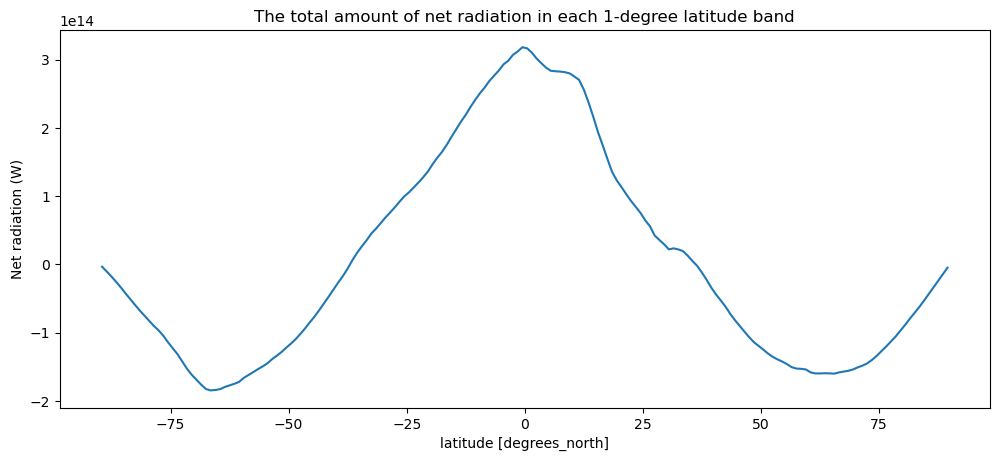

In [11]:
#calculate each 1 degree latitude,use the sum method
net_ra=all*area*1e6
Total_net_ra_band=net_ra.sum(['lon'])
Total_net_ra_band
fig = plt.figure(figsize=(12,5), dpi=100)
Total_net_ra_band.plot()
plt.title("The total amount of net radiation in each 1-degree latitude band",fontsize=12)
plt.ylabel('Net radiation (W)')
plt.show()

In [12]:
#use the where method select the low25 and high75 region, and average the time 
sw_low=ds.toa_sw_all_mon.where(ds.cldarea_total_daynight_mon<=25).mean(dim=['time'])
sw_high=ds.toa_sw_all_mon.where(ds.cldarea_total_daynight_mon>=75).mean(dim=['time'])
lw_low=ds.toa_lw_all_mon.where(ds.cldarea_total_daynight_mon<=25).mean(dim=['time'])
lw_high=ds.toa_lw_all_mon.where(ds.cldarea_total_daynight_mon>=75).mean(dim=['time'])

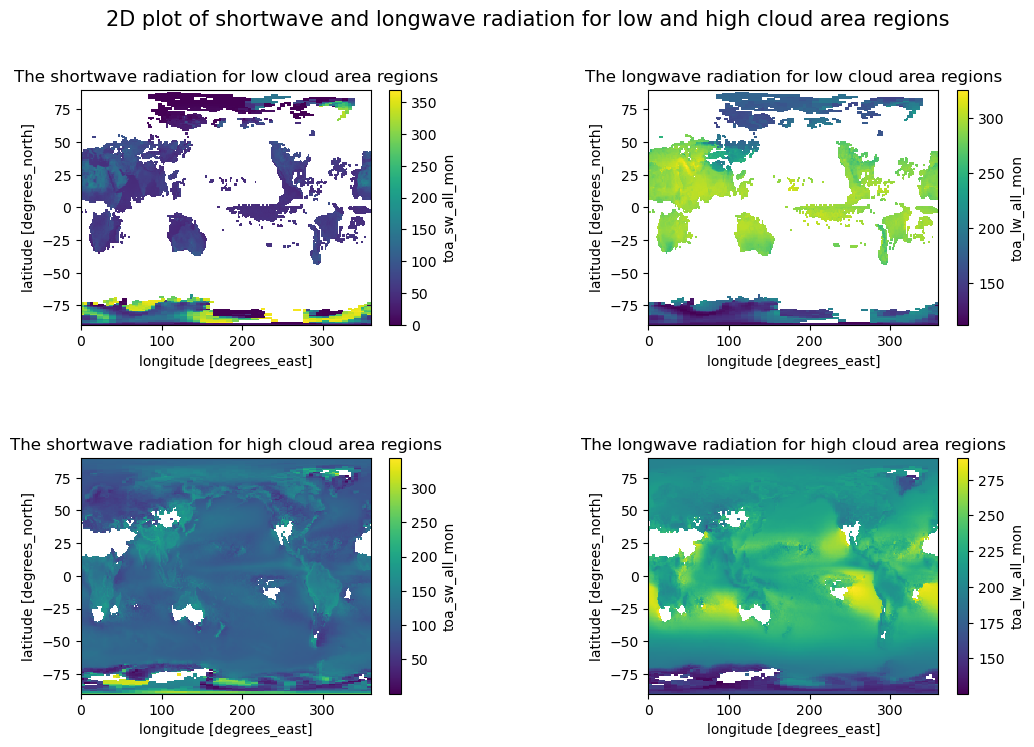

In [14]:
#plot the figures and the parameters
fields = {0:'The shortwave radiation for low cloud area regions', 
          1:'The longwave radiation for low cloud area regions', 
          2:'The shortwave radiation for high cloud area regions', 
          3:'The longwave radiation for high cloud area regions'}
fig = plt.figure(figsize=(12,8), dpi=100)
grid = plt.GridSpec(10, 10) 
plt.subplot(grid[0:4,0:4]) 
sw_low.plot()  
plt.title(fields[0])
plt.subplot(grid[0:4,6:10]) 
lw_low.plot()  
plt.title(fields[1])
plt.subplot(grid[6:10,0:4]) 
sw_high.plot()  
plt.title(fields[2])
plt.subplot(grid[6:10,6:10]) 
lw_high.plot()  
plt.title(fields[3])
plt.suptitle('2D plot of shortwave and longwave radiation for low and high cloud area regions ', fontsize=15)  
plt.show()

In [43]:
sw_low_=sw_low*area*1e6
sw_low_gm=sw_low_.sum()/Total_surface_area/1e6
sw_low_gm

<xarray.DataArray ()>
array(19.65188625)

In [44]:
lw_low_=lw_low*area*1e6
lw_low_gm=lw_low_.sum()/Total_surface_area/1e6
lw_low_gm

<xarray.DataArray ()>
array(70.50560434)

In [45]:
sw_high_=sw_high*area*1e6
sw_high_gm=sw_high_.sum()/Total_surface_area/1e6
sw_high_gm

<xarray.DataArray ()>
array(104.54761502)

In [46]:
lw_high_=lw_high*area*1e6
lw_high_gm=lw_high_.sum()/Total_surface_area/1e6
lw_high_gm

<xarray.DataArray ()>
array(208.53531147)